In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(fpp2)
library(ggplot2)
library(tseries)
library(xts)
library(lubridate)

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: ── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

R[write to console]: ✔ ggplot2   3.3.6      ✔ fma       2.4   
✔ forecast  8.17.0     ✔ expsmooth 2.3   

R[write to console]: 

R[write to console]: 
    ‘tseries’ version: 0.10-51

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
%%R
raw = read.csv("final_daily.csv")
date_time = as_datetime(raw[,1])
price = xts( x = raw[,"price"], order.by = date_time) 
demand = xts( x = raw[,"demand"], order.by = date_time) 

demand_train = demand["2020/2021"]; demand_test = demand["2022"]
price_train = price["2020/2021"]; price_test = price["2022"]

## Price

In [4]:
%%R
out =  ets( price_train )
fit = ets( c(price_train, price_test), model = out )
summary(fit)

R[write to console]: Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.



ETS(A,N,N) 

Call:
 ets(y = c(price_train, price_test), model = out) 

  Smoothing parameters:
    alpha = 0.3604 

  Initial states:
    l = 5.2132 

  sigma:  12.6665

     AIC     AICc      BIC 
13238.77 13238.78 13248.76 

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.06400124 12.65493 8.660351 -33.04617 168.2521 0.3081156
                  ACF1
Training set 0.1616888


In [5]:
%%R
pred = tail( fitted(fit ), n = length(price_test) )

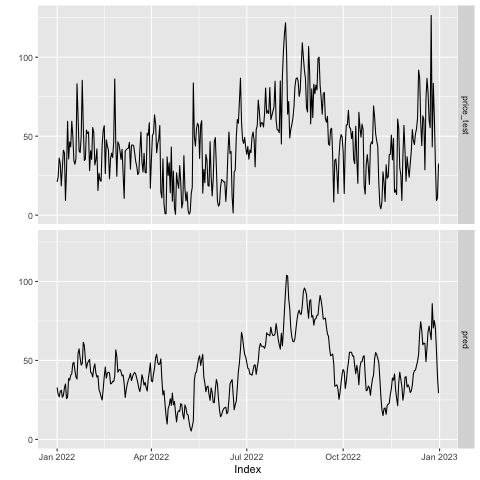

In [6]:
%%R
result= cbind(price_test,pred)
autoplot(result)

In [7]:
%%R

diff = result$price_test-result$pred
MSE = mean(diff^2)
MSE

[1] 281.0278


In [8]:
%%R
MAE=mean(abs(diff))
MAE

[1] 12.92579


In [9]:
%%R
error = abs(price_test-pred)/abs(price_test)
error[error > 1] = 1
mean(error)

[1] 0.3399347


## Demand

In [10]:
%%R
out =  ets( demand_train )
fit = ets( c(demand_train, demand_test), model = out )
summary(fit)
pred = tail( fitted(fit ), n = length(demand_test) )

R[write to console]: Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.



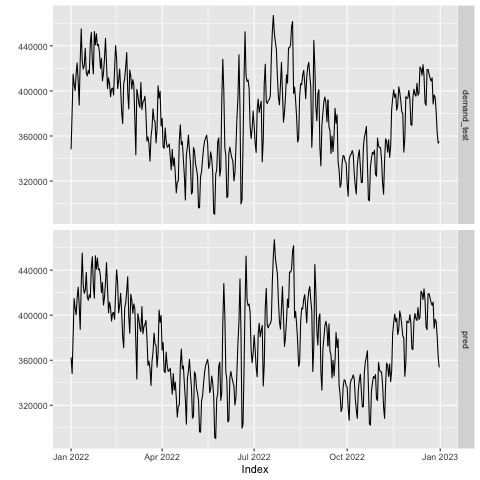

In [11]:
%%R
result= cbind(demand_test,pred)
autoplot(result)

In [12]:
%%R
diff = result$demand_test-result$pred
MSE = mean(diff^2)
MSE

[1] 414561058


In [13]:
%%R
MAE=mean(abs(diff))
MAE

[1] 15270.6


In [14]:
%%R
error = abs(demand_test-pred)/abs(demand_test)
error[error > 1] = 1
mean(error)

[1] 0.04089591
